In [1]:
import gdown
import os
import pathlib
import tarfile
from fuzzy_sql import fuzzy_sql

# Import Data

In [2]:
#Import data
url='https://drive.google.com/file/d/1puOiFfQPRLo1zheUg5LGuRtPQSSrqGYP/view?usp=sharing'
gdown.download(url=url, quiet=False, fuzzy=True)
data_path=pathlib.Path(os.path.join(os.getcwd(),'fuzzy_sql_sdgd.tar'))

Downloading...
From: https://drive.google.com/uc?id=1puOiFfQPRLo1zheUg5LGuRtPQSSrqGYP
To: /home/samer/projects/fuzzy_sql/notebooks/fuzzy_sql_sdgd.tar
100%|██████████| 174M/174M [00:03<00:00, 47.6MB/s] 


In [3]:
#Extract sample data (C1)
tar=tarfile.open(data_path,"r:")
tar.extract('C1.csv')
tar.extract('C1_syn_06.csv')
tar.extract('C1.json')
tar.close()
real_data_path=os.path.join(os.getcwd(), 'C1.csv')
metadata_path=os.path.join(os.getcwd(), 'C1.json')
syn_data_path=os.path.join(os.getcwd(), 'C1_syn_06.csv')

# Generate Random Queries

Table C1 already exists in the database
Table C1_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated Conditioned Aggregate Query 3 
Generated Conditioned Aggregate Query 4 
Generated Conditioned Aggregate Query 5 
Generated Conditioned Aggregate Query 6 
Generated Conditioned Aggregate Query 7 
Generated Conditioned Aggregate Query 8 
Generated Conditioned Aggregate Query 9 
Generated Conditioned Aggregate Query 10 
Generated Conditioned Aggregate Query 11 
Generated Conditioned Aggregate Query 12 
Generated Conditioned Aggregate Query 13 
Generated Conditioned Aggregate Query 14 
Generated Conditioned Aggregate Query 15 
Generated Conditioned Aggregate Query 16 
Generated Conditioned Aggregate Query 17 
Generated Conditioned Aggregate Query 18 
Generated Conditioned Aggregate Query 19 
Generated Conditioned Aggregate Query 20 
Generated Conditioned Aggregate Query 21 

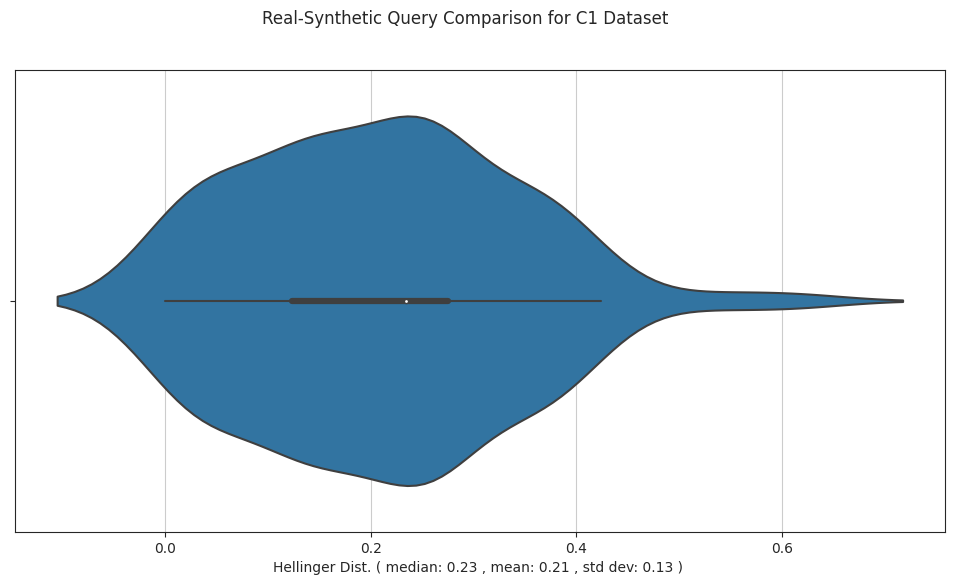

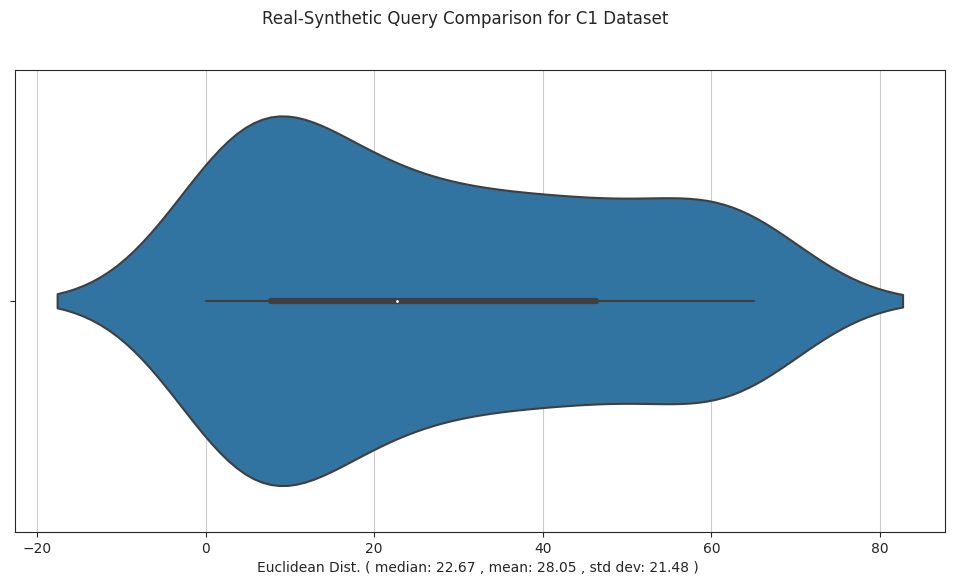

In [4]:
#Generate 100 random queries
queries=fuzzy_sql.fuzz_tabular(100,'twin_aggfltr', real_data_path, metadata_path,syn_data_path)

# Extract more information

In [5]:
# The returned dictionary has the following keys: 
print(f"{list(queries.keys())[0]}: The result of querying the real data.")
print(f"{list(queries.keys())[1]}: The result of querying the synthetic data")
print(f"{list(queries.keys())[2]}: A dictionary that includes important parameters about the query.")
print(f"{list(queries.keys())[3]}: The query Hellinger distance.")
print(f"{list(queries.keys())[4]}: The query Normalized (i.e. scaled and divide by its dimension) Euclidean  distance.")

query_real: The result of querying the real data.
query_syn: The result of querying the synthetic data
query_params: A dictionary that includes important parameters about the query.
hlngr_dist: The query Hellinger distance.
ecldn_dist: The query Normalized (i.e. scaled and divide by its dimension) Euclidean  distance.


In [6]:
# For instance, we can retrieve the information about the third random (index=2) query:
# The executed random query on real data ..:
queries['query_params'][2]['real_sql']

"SELECT education,workclass,MIN(fnlwgt), COUNT(*) FROM C1 WHERE (capital <> 0)  OR (income LIKE '<=50K'  AND  relationship IN ('Own-child', 'Unmarried', 'Not-in-family', 'Wife'))   GROUP BY education,workclass"

In [7]:
# resulted in:
queries['query_real'][2].head(10)

,education,workclass,MIN(fnlwgt),COUNT(*)
0,10th,?,23233.0,121.0
1,10th,Federal-gov,24153.0,12.0
2,10th,Local-gov,36489.0,31.0
3,10th,Private,21698.0,662.0
4,10th,Self-emp-inc,61838.0,16.0
5,10th,Self-emp-not-inc,30800.0,48.0
6,10th,State-gov,41506.0,9.0
7,11th,?,25837.0,150.0
8,11th,Federal-gov,29078.0,13.0
9,11th,Local-gov,33114.0,41.0


In [8]:
# and its twin query on synthetic data..
queries['query_params'][2]['syn_sql']

"SELECT education,workclass,MIN(fnlwgt), COUNT(*) FROM C1_syn_06 WHERE (capital <> 0)  OR (income LIKE '<=50K'  AND  relationship IN ('Own-child', 'Unmarried', 'Not-in-family', 'Wife'))   GROUP BY education,workclass"

In [9]:
# resulted in: 
queries['query_syn'][2].head(10)

,education,workclass,MIN(fnlwgt),COUNT(*)
0,10th,?,141435.459351,153
1,10th,Federal-gov,144365.336560,21
2,10th,Local-gov,161006.423335,52
3,10th,Private,144016.679340,1033
4,10th,Self-emp-inc,143784.618761,31
5,10th,Self-emp-not-inc,149873.498069,111
6,10th,State-gov,145407.237216,29
7,11th,?,149793.382726,157
8,11th,Federal-gov,144343.013701,15
9,11th,Local-gov,142950.326003,57


In [10]:
# with the following Hellinger and Euclidean distances:
print(f"Hellinger: {queries['hlngr_dist'][2]} and Euclidean: {queries['ecldn_dist'][2]} ")

Hellinger: 0.05925606364447826 and Euclidean: 10.392304845413264 


In [11]:
# Note that you always find that the length of query_real is equal to the length of query_syn. This is because the records are saved after matching all the records where non-existing records are denoted with nan entries
print(f"Length of query_real: {len(queries['query_real'][2])} and Length of syn_real: {len(queries['query_syn'][2])}")
# But you can find teh actual number of records returned by the random queries by check the query parameters
print(f"Actual number of resulting records from real data equals is : {queries['query_params'][2]['real_n_rcrds']} while the number of records resulting from syntehtic data is: {queries['query_params'][2]['syn_n_rcrds']}")

Length of query_real: 112 and Length of syn_real: 112
Actual number of resulting records from real data equals is : 108 while the number of records resulting from syntehtic data is: 112
